In [1]:
##########            Hough Transform         ###############

import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

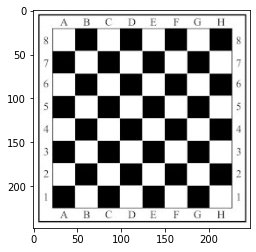

In [2]:
imgclr=cv2.cvtColor(cv2.imread('images/chess.jpg'),cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(imgclr,cv2.COLOR_RGB2GRAY)
plt.imshow(img,'gray')
plt.show()

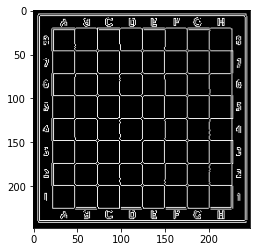

In [3]:
edge=cv2.Canny(img,100,50)
plt.imshow(edge,'gray')
plt.show()

In [4]:
ac_height=round(math.sqrt(edge.shape[0]**2+edge.shape[1]**2))
ac_width=ac_height
d_theta=math.pi/ac_width
accumulator=np.zeros((ac_height,ac_width),np.uint32)
for i in range(edge.shape[0]):
    for j in range(edge.shape[1]):
        if edge[i,j]==255:
            for theta in range(ac_width):
                rho=round(j*math.cos(theta*d_theta)+i*math.sin(d_theta*theta))
                accumulator[rho,theta]+=1


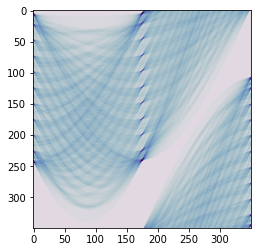

In [5]:
plt.imshow(accumulator,'twilight')
plt.show()

In [6]:
thres=100
imgc=imgclr+0
for rho in range(accumulator.shape[0]):
  for theta in range(accumulator.shape[1]):
    if accumulator[rho,theta]>thres:
        a = math.cos((theta*d_theta))
        b = math.sin((theta*d_theta))
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + img.shape[1] * (-b))
        y1 = int(y0 + img.shape[0] * (a))
        x2 = int(x0 - img.shape[1] * (-b))
        y2 = int(y0 - img.shape[0] * (a))
        #print('(',x2,y2,')','(',x1,y1,')')
        imgc=cv2.line(imgc,(x1,y1),(x2,y2),(0,0,255),1)


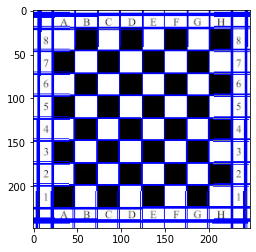

In [7]:
plt.imshow(imgc)
plt.show()